In [90]:
# Import bibliotek

import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
from tabulate import tabulate

In [91]:
df = pd.read_csv("results.csv")
df = df.sort_values(by= 'proc_time')

In [92]:
df

,proc_time,event_time,temperature,location,warning
0,2023-06-06 19:07:44.349,06-06-2023 19:07:44:349730,67.282430,Hala Katowice,medium
1,2023-06-06 19:07:48.355,06-06-2023 19:07:48:355331,67.796350,Hala Katowice,medium
2,2023-06-06 19:07:52.359,06-06-2023 19:07:52:359709,68.993965,Hala Katowice,medium
3,2023-06-06 19:07:56.365,06-06-2023 19:07:56:365427,78.270050,Hala Katowice,high
4,2023-06-06 19:08:00.368,06-06-2023 19:08:00:368456,78.270050,Hala Katowice,high
...,...,...,...,...,...
91,2023-06-06 19:13:48.809,06-06-2023 19:13:48:809688,5.332488,Hala Katowice,low
92,2023-06-06 19:13:52.815,06-06-2023 19:13:52:815124,5.279930,Hala Katowice,low
93,2023-06-06 19:13:56.820,06-06-2023 19:13:56:820476,4.516352,Hala Katowice,low
94,2023-06-06 19:14:00.825,06-06-2023 19:14:00:825803,4.405504,Hala Katowice,low


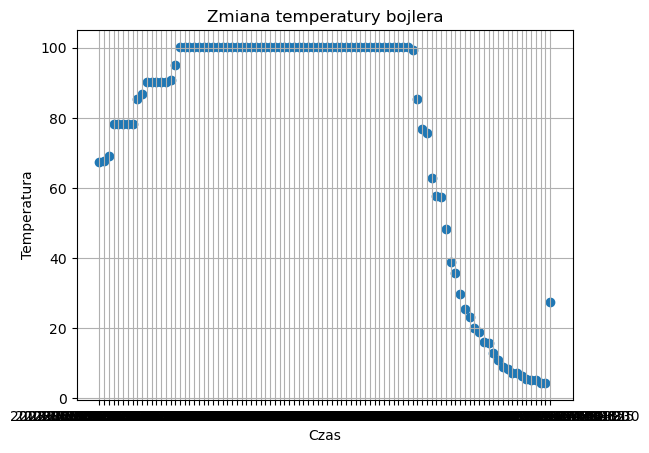

In [93]:
# Wykres punktowy, zmiany temperatury w badanym okresie
temperature_data = df

plt.scatter(temperature_data['proc_time'],temperature_data['temperature'])

plt.xlabel('Czas')

plt.ylabel('Temperatura')

plt.title('Zmiana temperatury bojlera')

plt.grid(True)

plt.show()

In [94]:
# Statystki
temperature_data = df

# Średnia
mean = stat.mean(temperature_data['temperature'])

# Mediana
median = stat.median(temperature_data['temperature'])

# Odchylenie standardowe
stdev = stat.stdev(temperature_data['temperature'])

# Wartość najmniejsza
min_value = min(temperature_data['temperature'])

# Wartość największa
max_value = max(temperature_data['temperature'])

# Tabela
data = [["Średnia", mean], 
        ["Mediana", median], 
        ["Odchylenie Standardowe", stdev], 
        ["Wartość najmniejsza", min_value],
        ["Wartość największa", max_value]]
  
col_names = ["Statystka", "Wartość"]
  
print(tabulate(data, headers=col_names, tablefmt="pretty"))

+------------------------+-------------------+
|       Statystka        |      Wartość      |
+------------------------+-------------------+
|        Średnia         | 75.17778424895833 |
|        Mediana         |     100.22806     |
| Odchylenie Standardowe | 34.96150428753875 |
|  Wartość najmniejsza   |     4.405504      |
|   Wartość największa   |     100.22806     |
+------------------------+-------------------+


In [95]:
# Określanie poziomu warningu

df.loc[df['temperature'] < 20, 'warning'] = 'low'

df.loc[(df['temperature'] >= 20) & (df['temperature'] <= 70), 'warning'] = 'medium'

df.loc[df['temperature'] > 70, 'warning'] = 'high'

In [96]:
df

,proc_time,event_time,temperature,location,warning
0,2023-06-06 19:07:44.349,06-06-2023 19:07:44:349730,67.282430,Hala Katowice,medium
1,2023-06-06 19:07:48.355,06-06-2023 19:07:48:355331,67.796350,Hala Katowice,medium
2,2023-06-06 19:07:52.359,06-06-2023 19:07:52:359709,68.993965,Hala Katowice,medium
3,2023-06-06 19:07:56.365,06-06-2023 19:07:56:365427,78.270050,Hala Katowice,high
4,2023-06-06 19:08:00.368,06-06-2023 19:08:00:368456,78.270050,Hala Katowice,high
...,...,...,...,...,...
91,2023-06-06 19:13:48.809,06-06-2023 19:13:48:809688,5.332488,Hala Katowice,low
92,2023-06-06 19:13:52.815,06-06-2023 19:13:52:815124,5.279930,Hala Katowice,low
93,2023-06-06 19:13:56.820,06-06-2023 19:13:56:820476,4.516352,Hala Katowice,low
94,2023-06-06 19:14:00.825,06-06-2023 19:14:00:825803,4.405504,Hala Katowice,low


Statystyki

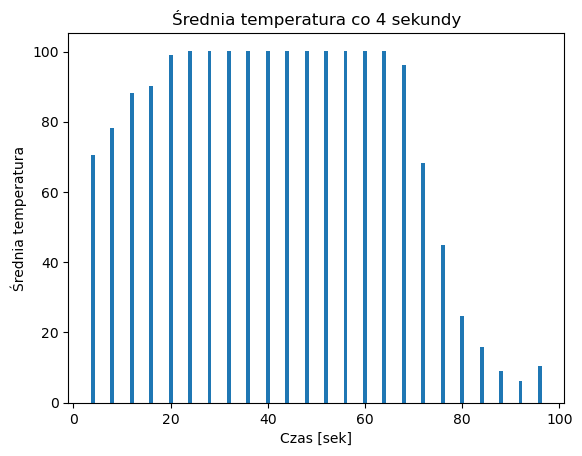

In [97]:
# Wykres słupkowy, przedstawiający zakres temperatury z 4 sekund

temperature_data = df["temperature"]

average_every_4_seconds = []

for i in range(0, len(temperature_data), 4):

    average = temperature_data[i:i+4].mean()

    average_every_4_seconds.append(average)

time_ticks = range(4, len(temperature_data)+4, 4)

plt.bar(time_ticks, average_every_4_seconds)

plt.xlabel("Czas [sek]")

plt.ylabel("Średnia temperatura")

plt.title("Średnia temperatura co 4 sekundy")

plt.show()

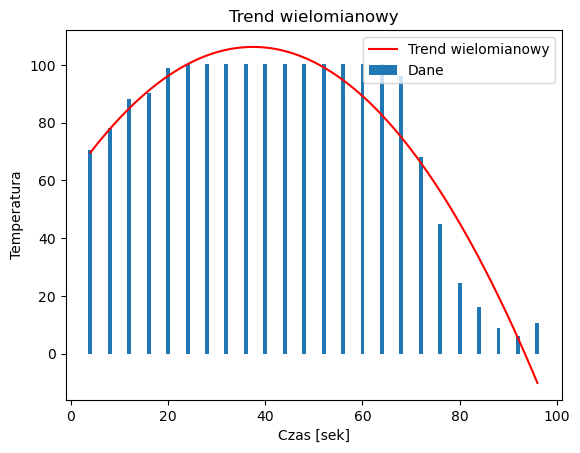

In [98]:
# Obliczenie współczynników trendu wielomianowego

coefficients = np.polyfit(time_ticks, average_every_4_seconds, 3)

polynomial = np.poly1d(coefficients)

# Generowanie wykresu słupkowego

plt.bar(time_ticks, average_every_4_seconds, label='Dane')

# Generowanie linii trendu wielomianowego

x_range = np.linspace(min(time_ticks), max(time_ticks), 100)

plt.plot(x_range, polynomial(x_range), color='red', label='Trend wielomianowy')

# Dodanie legendy i etykiet osi

plt.title('Trend wielomianowy')

plt.xlabel('Czas [sek]')

plt.ylabel('Temperatura')

plt.legend()

# Wyświetlenie wykresu

plt.show()

In [99]:
# Obliczenie częstości występowania stanu warning

df1 = pd.DataFrame(df)

grouped_counts = df1.groupby('warning').size().reset_index(name='Liczba')

print(grouped_counts)

  warning  Liczba
0    high      67
1     low      15
2  medium      14


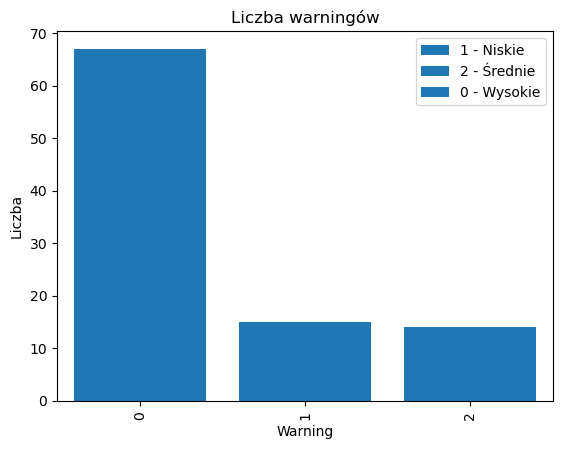

In [100]:
# Dodanie etykiet i tytułu

wykres = grouped_counts

grouped_counts.plot(kind='bar',legend = None)

plt.legend(legend_labels)

plt.xlabel('Warning')

plt.ylabel('Liczba')

plt.title('Liczba warningów')

# Wyświetlenie wykresu

plot1 = plt.bar(range(len(grouped_counts['Liczba'])), grouped_counts['Liczba'])

legend_labels = ['1 - Niskie', '2 - Średnie', '0 - Wysokie'] 

plt.legend(plot1, legend_labels)

In [101]:
test = grouped_counts.iloc[:, 1]

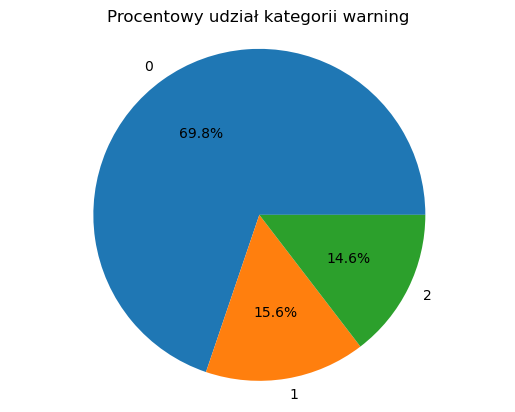

In [102]:
# Tworzenie wykresu kołowego

plt.pie(test, labels=test.index, autopct='%1.1f%%')

plt.axis('equal')

plt.title('Procentowy udział kategorii warning')

plt.show()